# SEATTLE AIRBNB OPEN DATA 
Understanding the Airbnb rental landscape in Seattle using data science. 

#### Download CSV Files from [here](https://www.kaggle.com/airbnb/seattle/data)

***
# PROBLEM STATEMENT
- Determining best predictors of listing price, and modelling a multi-variate listing price predictor.  
- Sentiment analysis on listing summary and advise host on how to best advertise their listing. 

#### Data Pre-processing / Cleaning 
- Drop unnecessary features (eg scraper id scrape date, listing url, picture urls, hosturl, host thumbnail, host pic etc). 
- Drop NaN values. 
- Format data (eg. price).
- One hot encode amenities.
- Derive feature Revenue. 

#### Data Exploration for Feature Selection
- Exploring which of the features has the highest correlation with listing price.
- Explore categorical variables (value counts, count plots, swarm plots).
- Explore numeric variables (statistical analysis, boxplots, displots, violinplots, heatmap, joinplot).

#### Data Visualisation
- Visualising the bookings with map of Seatle.
- Visualising the words used in summary using Text Cloud (Sentiment Analysis).

#### Regression
Attempting multivariate regression to predict listing price. Training approaches adopted are as follows:
* RandomForestRegressor
* XGBRegressor (Boosted Trees)

Also predicting important features for price determination.


In [10]:
# Importing the initial relevant packages, subsequent required packagaes will be imported later on.

from lxml import html
import requests
import re
import csv
import pandas as pd
import numpy as np
import nltk
import regex
import seaborn as sb
import matplotlib.pyplot as plt

In [11]:
# Importing dataset

airbnb_data = pd.read_csv('listings.csv')
airbnb_data.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview        ...         \
0                                                NaN        ...          
1  Queen Anne is a wonderful, truly functional vi...        ...          
2  Upper Queen Anne is a charming neighborhood fu...        ...          
3                                                NaN        ...          
4  We are in the beautiful neighborhood of Queen ...        ...          

  review_scores_value requires_license license jurisdiction_names  \
0                10.0                f     NaN         WASHINGTON   
1                10.0                f     NaN         WASHINGTON   
2                10.0                f     NaN         WASHINGTON   
3                 NaN                f     NaN         WASHINGTON   
4                 9.0                f     NaN         WASHINGTON   

  instant_bookable cancellation_policy  require_guest_profile_picture  \
0                f            moderate                              f   
1                f              strict                              t   
2                f              strict                              f   
3                f            flexible                              f   
4                f              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [12]:
airbnb_data.describe()

id     scrape_id       host_id  host_listings_count  \
count  3.818000e+03  3.818000e+03  3.818000e+03          3816.000000   
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.157757   
std    2.962660e+06  0.000000e+00  1.458382e+07            28.628149   
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000   
25%    3.258256e+06  2.016010e+13  3.275204e+06             1.000000   
50%    6.118244e+06  2.016010e+13  1.055814e+07             1.000000   
75%    8.035127e+06  2.016010e+13  2.590309e+07             3.000000   
max    1.034016e+07  2.016010e+13  5.320861e+07           502.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                3816.000000  3818.000000  3818.000000   3818.000000   
mean                    7.157757    47.628961  -122.333103      3.349398   
std                    28.628149     0.043052     0.031745      1.977599   
min                     1.000000    47.505088  -122.417219      1.000000   
25%                     1.000000    47.609418  -122.354320      2.000000   
50%                     1.000000    47.623601  -122.328874      3.000000   
75%                     3.000000    47.662694  -122.310800      4.000000   
max                   502.000000    47.733358  -122.240607     16.000000   

         bathrooms     bedrooms        ...          review_scores_rating  \
count  3802.000000  3812.000000        ...                   3171.000000   
mean      1.259469     1.307712        ...                     94.539262   
std       0.590369     0.883395        ...                      6.606083   
min       0.000000     0.000000        ...                     20.000000   
25%       1.000000     1.000000        ...                     93.000000   
50%       1.000000     1.000000        ...                     96.000000   
75%       1.000000     2.000000        ...                     99.000000   
max       8.000000     7.000000        ...                    100.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count             3160.000000                3165.000000   
mean                 9.636392                   9.556398   
std                  0.698031                   0.797274   
min                  2.000000                   3.000000   
25%                  9.000000                   9.000000   
50%                 10.000000                  10.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       review_scores_checkin  review_scores_communication  \
count            3160.000000                  3167.000000   
mean                9.786709                     9.809599   
std                 0.595499                     0.568211   
min                 2.000000                     2.000000   
25%                10.000000                    10.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       review_scores_location  review_scores_value  license  \
count             3163.000000          3162.000000      0.0   
mean                 9.608916             9.452245      NaN   
std                  0.629053             0.750259      NaN   
min                  4.000000             2.000000      NaN   
25%                  9.000000             9.000000      NaN   
50%                 10.000000            10.000000      NaN   
75%                 10.000000            10.000000      NaN   
max                 10.000000            10.000000      NaN   

       calculated_host_listings_count  reviews_per_month  
count                     3818.000000        3191.000000  
mean                         2.946307           2.078919  
std                          5.893029           1.822348  
min                          1.000000           0.020000  
25%                          1.000000       

In [13]:
airbnb_data.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [14]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

***
# DATA PRE-PROCESSING / CLEANING

#### Drop Irrelevant Data Features
Unnecessary data features being removed from airbnb_data, leaving numerical and categorial data for deeper analysis. 

In [15]:
airbnb_data2 = airbnb_data.copy() # Making a copy of original dataset for later use in sentiment analysis

airbnb_data = airbnb_data.drop([
'listing_url', 'scrape_id', 'last_scraped', 'summary', 'space', 'description', 'experiences_offered', 
'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications',
'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
'zipcode', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'bed_type', 'square_feet',
'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated', 'has_availability', 
'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'first_review',
'last_review', 'requires_license', 'license', 'jurisdiction_names', 'require_guest_profile_picture',
'require_guest_phone_verification', 'calculated_host_listings_count'], axis=1)

airbnb_data.head()

id                                 name neighbourhood_group_cleansed  \
0   241032         Stylish Queen Anne Apartment                   Queen Anne   
1   953595   Bright & Airy Queen Anne Apartment                   Queen Anne   
2  3308979  New Modern House-Amazing water view                   Queen Anne   
3  7421966                   Queen Anne Chateau                   Queen Anne   
4   278830       Charming craftsman 3 bdm house                   Queen Anne   

    latitude   longitude property_type        room_type  accommodates  \
0  47.636289 -122.371025     Apartment  Entire home/apt             4   
1  47.639123 -122.365666     Apartment  Entire home/apt             4   
2  47.629724 -122.369483         House  Entire home/apt            11   
3  47.638473 -122.369279     Apartment  Entire home/apt             3   
4  47.632918 -122.372471         House  Entire home/apt             6   

   bathrooms  bedrooms        ...          review_scores_rating  \
0        1.0       1.0        ...                          95.0   
1        1.0       1.0        ...                          96.0   
2        4.5       5.0        ...                          97.0   
3        1.0       0.0        ...                           NaN   
4        2.0       3.0        ...                          92.0   

  review_scores_accuracy review_scores_cleanliness  review_scores_checkin  \
0                   10.0                      10.0                   10.0   
1                   10.0                      10.0                   10.0   
2                   10.0                      10.0                   10.0   
3                    NaN                       NaN                    NaN   
4                    9.0                       9.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                     9.0                 10.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                 10.0   
3                          NaN                     NaN                  NaN   
4                         10.0                     9.0                  9.0   

   instant_bookable  cancellation_policy  reviews_per_month  
0                 f             moderate               4.07  
1                 f               strict               1.48  
2                 f               strict               1.15  
3                 f             flexible                NaN  
4                 f               strict               0.89  

[5 rows x 27 columns]

#### Further pre-processing steps
* Format price
* Account for null values in both numeric and categorical features 
* Rename id for easy dataframe merge later 

In [16]:
# Removing $ from price for numerical analysis 
airbnb_data['price'] = airbnb_data['price'].str.replace("[$, ]", "").astype("float")

# For numeric features, replacing null values with 0 
airbnb_data.at[airbnb_data['bathrooms'].isnull(), 'bathrooms'] = airbnb_data['bathrooms'].mean()
airbnb_data.at[airbnb_data['bedrooms'].isnull(), 'bedrooms'] = airbnb_data['bedrooms'].mean()
airbnb_data.at[airbnb_data['beds'].isnull(), 'beds'] = airbnb_data['beds'].mean() 
airbnb_data.at[airbnb_data['review_scores_rating'].isnull(), 'review_scores_rating'] = airbnb_data['review_scores_rating'].mean()
airbnb_data.at[airbnb_data['review_scores_accuracy'].isnull(), 'review_scores_accuracy'] = airbnb_data['review_scores_accuracy'].mean()
airbnb_data.at[airbnb_data['review_scores_cleanliness'].isnull(), 'review_scores_cleanliness'] = airbnb_data['review_scores_cleanliness'].mean()
airbnb_data.at[airbnb_data['review_scores_checkin'].isnull(), 'review_scores_checkin'] = airbnb_data['review_scores_checkin'].mean()
airbnb_data.at[airbnb_data['review_scores_location'].isnull(), 'review_scores_location'] = airbnb_data['review_scores_location'].mean()
airbnb_data.at[airbnb_data['review_scores_value'].isnull(), 'review_scores_value'] = airbnb_data['review_scores_value'].mean()

# Rename id to listing_id, for dataframe merge with revenue.csv later  
airbnb_data.rename(columns={'id':'listing_id'}, inplace=True)

# For categorical features, dropping Nan values
airbnb_data = airbnb_data.dropna()
airbnb_data = airbnb_data.reset_index(drop=True)

airbnb_data.head()

listing_id                                 name  \
0      241032         Stylish Queen Anne Apartment   
1      953595   Bright & Airy Queen Anne Apartment   
2     3308979  New Modern House-Amazing water view   
3      278830       Charming craftsman 3 bdm house   
4     5956968      Private unit in a 1920s mansion   

  neighbourhood_group_cleansed   latitude   longitude property_type  \
0                   Queen Anne  47.636289 -122.371025     Apartment   
1                   Queen Anne  47.639123 -122.365666     Apartment   
2                   Queen Anne  47.629724 -122.369483         House   
3                   Queen Anne  47.632918 -122.372471         House   
4                   Queen Anne  47.630525 -122.366174         House   

         room_type  accommodates  bathrooms  bedrooms        ...          \
0  Entire home/apt             4        1.0       1.0        ...           
1  Entire home/apt             4        1.0       1.0        ...           
2  Entire home/apt            11        4.5       5.0        ...           
3  Entire home/apt             6        2.0       3.0        ...           
4     Private room             2        1.0       1.0        ...           

   review_scores_rating review_scores_accuracy  review_scores_cleanliness  \
0                  95.0                   10.0                       10.0   
1                  96.0                   10.0                       10.0   
2                  97.0                   10.0                       10.0   
3                  92.0                    9.0                        9.0   
4                  95.0                   10.0                       10.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                         10.0                     9.0   
1                   10.0                         10.0                    10.0   
2                   10.0                         10.0                    10.0   
3                   10.0                         10.0                     9.0   
4                   10.0                         10.0                    10.0   

   review_scores_value  instant_bookable  cancellation_policy  \
0                 10.0                 f             moderate   
1                 10.0                 f               strict   
2                 10.0                 f               strict   
3                  9.0                 f               strict   
4                 10.0                 f               strict   

   reviews_per_month  
0               4.07  
1               1.48  
2               1.15  
3               0.89  
4               2.45  

[5 rows x 27 columns]

#### Adding Total Reviews
The reviews score for each listing is segmented by different aspects (communication, cleanliness etc.). Hence, creating a new Total Reviews feature/column which shows the Total Review score for each listing, which is a summation of all the individual scores. 

In [17]:
# Adding new Total Reviews feature/column (summation of all reviews for each listing)

airbnb_data['total_reviews'] = airbnb_data.apply(lambda row: 
                               row['review_scores_rating'] + 
                               row['review_scores_accuracy'] +
                               row['review_scores_cleanliness'] +
                               row['review_scores_checkin'] +
                               row['review_scores_location'] +
                               row['review_scores_value'], axis=1)

airbnb_data.head()

listing_id                                 name  \
0      241032         Stylish Queen Anne Apartment   
1      953595   Bright & Airy Queen Anne Apartment   
2     3308979  New Modern House-Amazing water view   
3      278830       Charming craftsman 3 bdm house   
4     5956968      Private unit in a 1920s mansion   

  neighbourhood_group_cleansed   latitude   longitude property_type  \
0                   Queen Anne  47.636289 -122.371025     Apartment   
1                   Queen Anne  47.639123 -122.365666     Apartment   
2                   Queen Anne  47.629724 -122.369483         House   
3                   Queen Anne  47.632918 -122.372471         House   
4                   Queen Anne  47.630525 -122.366174         House   

         room_type  accommodates  bathrooms  bedrooms      ...        \
0  Entire home/apt             4        1.0       1.0      ...         
1  Entire home/apt             4        1.0       1.0      ...         
2  Entire home/apt            11        4.5       5.0      ...         
3  Entire home/apt             6        2.0       3.0      ...         
4     Private room             2        1.0       1.0      ...         

   review_scores_accuracy review_scores_cleanliness  review_scores_checkin  \
0                    10.0                      10.0                   10.0   
1                    10.0                      10.0                   10.0   
2                    10.0                      10.0                   10.0   
3                     9.0                       9.0                   10.0   
4                    10.0                      10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                     9.0                 10.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                 10.0   
3                         10.0                     9.0                  9.0   
4                         10.0                    10.0                 10.0   

   instant_bookable  cancellation_policy  reviews_per_month  total_reviews  
0                 f             moderate               4.07          144.0  
1                 f               strict               1.48          146.0  
2                 f               strict               1.15          147.0  
3                 f               strict               0.89          138.0  
4                 f               strict               2.45          145.0  

[5 rows x 28 columns]

### Cleaning Amenities
Amenities for each listing are available as a string. Extracting all amentities, one hot encoding them and adding them to *airbnb_data* dataframe as individual features for further analysis and training of model.

In [49]:
# One hot encoding all amenities for easy analysis and training 

from sklearn.preprocessing import MultiLabelBinarizer

def clean_amenities(amenities):
    amenities=amenities.replace('{','')
    amenities=amenities.replace('}','')
    amenities=amenities.replace('"','')
    amenities=amenities.split(',')
    return amenities

airbnb_data['amenities']= airbnb_data['amenities'].apply(lambda x:clean_amenities(x))

enc = MultiLabelBinarizer()
onehot = enc.fit_transform(airbnb_data['amenities'])
amenities_one_hot = pd.DataFrame(data = onehot, columns = enc.classes_, index = airbnb_data.index)

amenities_one_hot.drop('',axis=1,inplace=True)

airbnb_data = airbnb_data.merge(amenities_one_hot,left_index=True,right_index=True)
airbnb_data.head()

listing_id                                 name  \
0      241032         Stylish Queen Anne Apartment   
1      953595   Bright & Airy Queen Anne Apartment   
2     3308979  New Modern House-Amazing water view   
3      278830       Charming craftsman 3 bdm house   
4     5956968      Private unit in a 1920s mansion   

  neighbourhood_group_cleansed   latitude   longitude property_type  \
0                   Queen Anne  47.636289 -122.371025     Apartment   
1                   Queen Anne  47.639123 -122.365666     Apartment   
2                   Queen Anne  47.629724 -122.369483         House   
3                   Queen Anne  47.632918 -122.372471         House   
4                   Queen Anne  47.630525 -122.366174         House   

         room_type  accommodates  bathrooms  bedrooms  ...  Safety Card  \
0  Entire home/apt             4        1.0       1.0  ...            0   
1  Entire home/apt             4        1.0       1.0  ...            1   
2  Entire home/apt            11        4.5       5.0  ...            0   
3  Entire home/apt             6        2.0       3.0  ...            0   
4     Private room             2        1.0       1.0  ...            0   

  Shampoo  Smoke Detector  Smoking Allowed  Suitable for Events  TV  Washer  \
0       0               0                0                    0   1       1   
1       0               1                0                    0   1       1   
2       1               1                0                    0   1       1   
3       1               1                0                    0   1       0   
4       1               1                0                    0   0       0   

   Washer / Dryer  Wheelchair Accessible  Wireless Internet  
0               0                      0                  1  
1               0                      0                  1  
2               0                      0                  1  
3               0                      0                  1  
4               0                      0                  1  

[5 rows x 69 columns]

## Merging Listings & Reviews
Appending reviews.csv data to airbnb_data, to calculate the Revenue of each listing. 
###### Revenue is a derived feature.

In [50]:
# Appending Reviews data to DataFrame & calculating Revenue of listing

# Importing reviews dataset
reviews_data = pd.read_csv('reviews.csv')

reviews_data = reviews_data[['id','listing_id','date']]

# Basic conversions
reviews_data['date'] = pd.to_datetime(reviews_data['date'])

reviews_data.head(5)

id  listing_id       date
0  38917982     7202016 2015-07-19
1  39087409     7202016 2015-07-20
2  39820030     7202016 2015-07-26
3  40813543     7202016 2015-08-02
4  41986501     7202016 2015-08-10

### Checking if reviews.csv tally with listings.csv 

In listings.csv, it has 'number_of_reviews' column, so just to check if number of reviews in reviews.csv is equal to SUM(number_of_reviews). Result shows empty result (0 rows), means that the number of reviews in reviews.csv matches the sum of number_of_reviews in listings.csv.

In [51]:
# Grouping the id's by their count to get the number of bookings in reviews
count_listing_reviws = reviews_data[['listing_id','id']].groupby(['listing_id']).count()
count_listing_reviws.columns = ['# of reviews']

# Checking if the number of reviews tally
airbnb_bookings = pd.merge(airbnb_data, count_listing_reviws, on='listing_id')
airbnb_bookings.at[airbnb_bookings['# of reviews'].isnull(), '# of reviews'] = 0
airbnb_bookings[airbnb_bookings['# of reviews'] != airbnb_bookings['number_of_reviews']]

Empty DataFrame
Columns: [listing_id, name, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bedrooms, beds, amenities, price, guests_included, minimum_nights, maximum_nights, number_of_reviews, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, cancellation_policy, reviews_per_month, total_reviews, 24-Hour Check-in, Air Conditioning, Breakfast, Buzzer/Wireless Intercom, Cable TV, Carbon Monoxide Detector, Cat(s), Dog(s), Doorman, Dryer, Elevator in Building, Essentials, Family/Kid Friendly, Fire Extinguisher, First Aid Kit, Free Parking on Premises, Gym, Hair Dryer, Hangers, Heating, Hot Tub, Indoor Fireplace, Internet, Iron, Kitchen, Laptop Friendly Workspace, Lock on Bedroom Door, Other pet(s), Pets Allowed, Pets live on this property, Pool, Safety Card, Shampoo, Smoke Detector, Smoking Allowed, Suitable for Events, TV, Washer, Washer / Dryer, Wheelchair Accessible, Wireless Internet, # of reviews]
Index: []

[0 rows x 70 columns]

As observable from above results, there is no discrepancy between the number of reviews from the originial airbnb_data dataset as well as reviews.csv

### Create final airbnb_listings DataFrame 

* After checking the tally, create dataframe airbnb_bookings using each review as one booking, and estimate revenue by 
(price * minimum_nights).
* Merge airbnb_bookings and airbnb_data on listing_id to get final airbnb_listings dataframe.

##### Assumption - Each customer leaves a review for each corresponding booking.

In [52]:
# CALCULATE ESTIMATED REVENUE FOR EACH LISTING

# get estimated bookings base on reviews
airbnb_bookings = pd.merge(reviews_data, airbnb_data, on='listing_id')
airbnb_bookings['estimated_revenue'] = airbnb_bookings['price'] * (airbnb_bookings['minimum_nights'])

# get revenue by listings
airbnb_listings_revenue = airbnb_bookings[['listing_id','estimated_revenue']].groupby(['listing_id']).sum()

airbnb_listings = pd.merge(airbnb_data, airbnb_listings_revenue, on='listing_id', how='left')
airbnb_listings.at[airbnb_listings['estimated_revenue'].isnull(), 'estimated_revenue'] = 0

airbnb_listings.head()

listing_id                                 name  \
0      241032         Stylish Queen Anne Apartment   
1      953595   Bright & Airy Queen Anne Apartment   
2     3308979  New Modern House-Amazing water view   
3      278830       Charming craftsman 3 bdm house   
4     5956968      Private unit in a 1920s mansion   

  neighbourhood_group_cleansed   latitude   longitude property_type  \
0                   Queen Anne  47.636289 -122.371025     Apartment   
1                   Queen Anne  47.639123 -122.365666     Apartment   
2                   Queen Anne  47.629724 -122.369483         House   
3                   Queen Anne  47.632918 -122.372471         House   
4                   Queen Anne  47.630525 -122.366174         House   

         room_type  accommodates  bathrooms  bedrooms  ...  Shampoo  \
0  Entire home/apt             4        1.0       1.0  ...        0   
1  Entire home/apt             4        1.0       1.0  ...        0   
2  Entire home/apt            11        4.5       5.0  ...        1   
3  Entire home/apt             6        2.0       3.0  ...        1   
4     Private room             2        1.0       1.0  ...        1   

  Smoke Detector  Smoking Allowed  Suitable for Events  TV  Washer  \
0              0                0                    0   1       1   
1              1                0                    0   1       1   
2              1                0                    0   1       1   
3              1                0                    0   1       0   
4              1                0                    0   0       0   

   Washer / Dryer  Wheelchair Accessible  Wireless Internet  estimated_revenue  
0               0                      0                  1            17595.0  
1               0                      0                  1            12900.0  
2               0                      0                  1            78000.0  
3               0                      0                  1            17100.0  
4               0                      0                  1             2040.0  

[5 rows x 70 columns]

***
# DATA EXPLORATION FOR FEATURE SELECTION

In [53]:
airbnb_listings.describe()

listing_id     latitude    longitude  accommodates    bathrooms  \
count  3.167000e+03  3167.000000  3167.000000   3167.000000  3167.000000   
mean   5.014717e+06    47.628618  -122.332878      3.385854     1.254342   
std    2.801209e+06     0.042946     0.031570      1.991968     0.598582   
min    4.291000e+03    47.505088  -122.417219      1.000000     0.000000   
25%    2.693418e+06    47.608701  -122.353981      2.000000     1.000000   
50%    5.286781e+06    47.623046  -122.328980      3.000000     1.000000   
75%    7.453024e+06    47.662235  -122.310570      4.000000     1.000000   
max    1.024814e+07    47.733358  -122.254189     16.000000     8.000000   

          bedrooms         beds        price  guests_included  minimum_nights  \
count  3167.000000  3167.000000  3167.000000      3167.000000     3167.000000   
mean      1.300600     1.743290   126.872119         1.708873        2.397221   
std       0.876057     1.155379    90.032908         1.308843       17.861688   
min       0.000000     1.000000    22.000000         0.000000        1.000000   
25%       1.000000     1.000000    75.000000         1.000000        1.000000   
50%       1.000000     1.000000   100.000000         1.000000        2.000000   
75%       2.000000     2.000000   150.000000         2.000000        2.000000   
max       7.000000    15.000000  1000.000000        13.000000     1000.000000   

       ...      Shampoo  Smoke Detector  Smoking Allowed  Suitable for Events  \
count  ...  3167.000000     3167.000000      3167.000000          3167.000000   
mean   ...     0.719924        0.872119         0.021471             0.058731   
std    ...     0.449107        0.334010         0.144973             0.235157   
min    ...     0.000000        0.000000         0.000000             0.000000   
25%    ...     0.000000        1.000000         0.000000             0.000000   
50%    ...     1.000000        1.000000         0.000000             0.000000   
75%    ...     1.000000        1.000000         0.000000             0.000000   
max    ...     1.000000        1.000000         1.000000             1.000000   

                TV       Washer  Washer / Dryer  Wheelchair Accessible  \
count  3167.000000  3167.000000     3167.000000            3167.000000   
mean      0.675718     0.783075        0.000316               0.080202   
std       0.468180     0.412216        0.017770               0.271649   
min       0.000000     0.000000        0.000000               0.000000   
25%       0.000000     1.000000        0.000000               0.000000   
50%       1.000000     1.000000        0.000000               0.000000   
75%       1.000000     1.000000        0.000000               0.000000   
max       1.000000     1.000000        1.000000               1.000000   

       Wireless Internet  estimated_revenue  
count        3167.000000       3.167000e+03  
mean            0.971266       6.304835e+03  
std             0.167084       2.470799e+04  
min             0.000000       2.200000e+01  
25%             1.000000       7.800000e+02  
50%             1.000000       2.400000e+03  
75%             1.000000       6.517000e+03  
max             1.000000       1.200000e+06  

[8 rows x 63 columns]

In [54]:
airbnb_listings.dtypes

listing_id                        int64
name                             object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
                                 ...   
Washer                            int32
Washer / Dryer                    int32
Wheelchair Accessible             int32
Wireless Internet                 int32
estimated_revenue               float64
Length: 70, dtype: object

In [55]:
airbnb_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3167 entries, 0 to 3166
Data columns (total 70 columns):
listing_id                      3167 non-null int64
name                            3167 non-null object
neighbourhood_group_cleansed    3167 non-null object
latitude                        3167 non-null float64
longitude                       3167 non-null float64
property_type                   3167 non-null object
room_type                       3167 non-null object
accommodates                    3167 non-null int64
bathrooms                       3167 non-null float64
bedrooms                        3167 non-null float64
beds                            3167 non-null float64
amenities                       3167 non-null object
price                           3167 non-null float64
guests_included                 3167 non-null int64
minimum_nights                  3167 non-null int64
maximum_nights                  3167 non-null int64
number_of_reviews               3167 non-nul

## Exploratory Analysis of Categorical Variables 

Exploratory analysis of features: 
- neighbourhood_group_cleansed
- room_type
- instant_bookable
- cancellation_policy
- amenities
- property_type

#### (i) Value Count

In [56]:
# Categorical Variables: Analysing using value counts 
# neighbourhood_group_cleansed, room_type, instant_bookable, cancellation_policy, property_type

print("Number of Neighbourhood groups:", len(airbnb_listings["neighbourhood_group_cleansed"].unique()))
print(airbnb_listings["neighbourhood_group_cleansed"].value_counts())

print("")

print("Number of Room type groups:", len(airbnb_listings["room_type"].unique()))
print(airbnb_listings["room_type"].value_counts())

print("")

print("Number of Instant Bookable groups:", len(airbnb_listings["instant_bookable"].unique()))
print(airbnb_listings["instant_bookable"].value_counts())

print("")

print("Number of Cancellation Policy groups:", len(airbnb_listings["cancellation_policy"].unique()))
print(airbnb_listings["cancellation_policy"].value_counts())

print("")

print("Number of Property Type groups:", len(airbnb_listings["property_type"].unique()))
print(airbnb_listings["property_type"].value_counts())

Number of Neighbourhood groups: 17
Other neighborhoods    653
Capitol Hill           460
Downtown               456
Central Area           319
Queen Anne             246
Ballard                193
West Seattle           162
Rainier Valley         134
Beacon Hill            103
University District     95
Delridge                65
Cascade                 65
Northgate               65
Lake City               56
Magnolia                47
Seward Park             39
Interbay                 9
Name: neighbourhood_group_cleansed, dtype: int64

Number of Room type groups: 3
Entire home/apt    2124
Private room        951
Shared room          92
Name: room_type, dtype: int64

Number of Instant Bookable groups: 2
f    2627
t     540
Name: instant_bookable, dtype: int64

Number of Cancellation Policy groups: 3
strict      1257
moderate    1133
flexible     777
Name: cancellation_policy, dtype: int64

Number of Property Type groups: 16
House              1458
Apartment          1426
Townhouse    

In [57]:
# Value counts for all amenities

amenities = ['24-Hour Check-in',                
            'Air Conditioning',                
            'Breakfast',                       
            'Buzzer/Wireless Intercom',        
            'Cable TV',                        
            'Carbon Monoxide Detector',        
            'Cat(s)',                          
            'Dog(s)',                          
            'Doorman',                         
            'Dryer',                           
            'Elevator in Building',            
            'Essentials',                      
            'Family/Kid Friendly',             
            'Fire Extinguisher',               
            'First Aid Kit',                   
            'Free Parking on Premises',        
            'Gym',                             
            'Hair Dryer',                      
            'Hangers',                         
            'Heating',                         
            'Hot Tub',                         
            'Indoor Fireplace',                
            'Internet',                        
            'Iron',                            
            'Kitchen',                         
            'Laptop Friendly Workspace',       
            'Lock on Bedroom Door',            
            'Other pet(s)',                    
            'Pets Allowed',                    
            'Pets live on this property',      
            'Pool',                            
            'Safety Card',                     
            'Shampoo',                         
            'Smoke Detector',                  
            'Smoking Allowed',                 
            'Suitable for Events',             
            'TV',                              
            'Washer',                          
            'Washer / Dryer',                  
            'Wheelchair Accessible',           
            'Wireless Internet', 
            ]

for amenity in amenities:
    
    print(amenity)
    print(airbnb_listings[amenity].value_counts())
    print("------------------------------------------------------")

24-Hour Check-in
0    2711
1     456
Name: 24-Hour Check-in, dtype: int64
------------------------------------------------------
Air Conditioning
0    2605
1     562
Name: Air Conditioning, dtype: int64
------------------------------------------------------
Breakfast
0    2919
1     248
Name: Breakfast, dtype: int64
------------------------------------------------------
Buzzer/Wireless Intercom
0    2712
1     455
Name: Buzzer/Wireless Intercom, dtype: int64
------------------------------------------------------
Cable TV
0    1946
1    1221
Name: Cable TV, dtype: int64
------------------------------------------------------
Carbon Monoxide Detector
1    2110
0    1057
Name: Carbon Monoxide Detector, dtype: int64
------------------------------------------------------
Cat(s)
0    2842
1     325
Name: Cat(s), dtype: int64
------------------------------------------------------
Dog(s)
0    2739
1     428
Name: Dog(s), dtype: int64
------------------------------------------------------
Doorma

Consider amenity features with highest counts for model training.
(eg. Heating, Internet, Kitchen, Smoke Detector, Washer, Wireless Internet) 

##### (ii) CatPlots

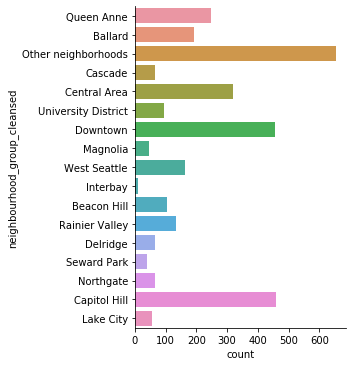

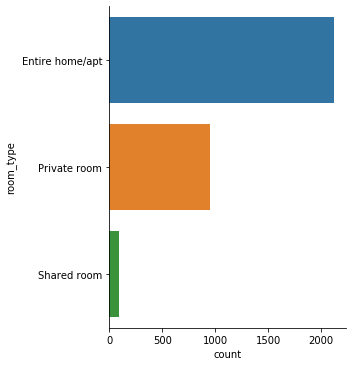

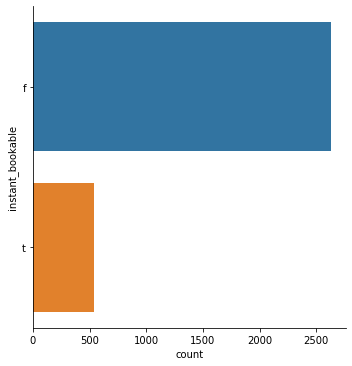

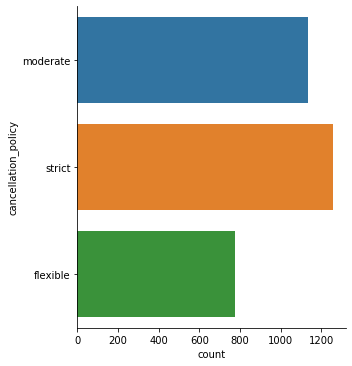

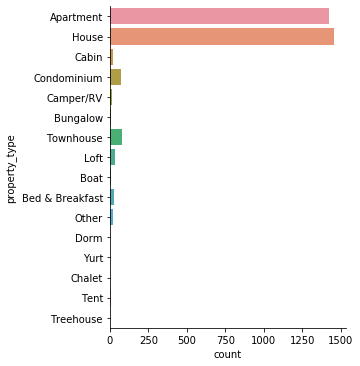

In [58]:
# Categorical Variables: Visualising using catplots
# neighbourhood_group_cleansed, room_type, instant_bookable, cancellation_policy, amenities

sb.catplot(y = "neighbourhood_group_cleansed", data = airbnb_listings, kind = "count")
sb.catplot(y = "room_type", data = airbnb_listings, kind = "count")
sb.catplot(y = "instant_bookable", data = airbnb_listings, kind = "count")
sb.catplot(y = "cancellation_policy", data = airbnb_listings, kind = "count")
sb.catplot(y = "property_type", data = airbnb_listings, kind = "count")

#### (iii) SwarmPlots

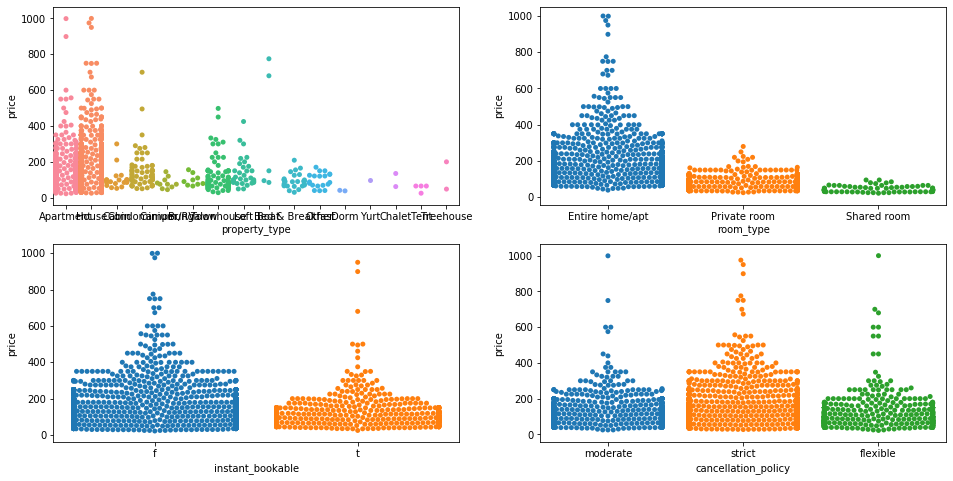

In [59]:
# Categorical Variables: Visualising using swarmplots
# neighbourhood_group_cleansed, room_type, instant_bookable, cancellation_policy, amenities

f, axes = plt.subplots(2, 2, figsize=(16,8))

sb.swarmplot(x = 'property_type', y = 'price', data = airbnb_listings, ax= axes[0,0])
sb.swarmplot(x = 'room_type', y = 'price', data = airbnb_listings, ax= axes[0,1])
sb.swarmplot(x = 'instant_bookable', y = 'price', data = airbnb_listings, ax= axes[1,0])
sb.swarmplot(x = 'cancellation_policy', y = 'price', data = airbnb_listings, ax= axes[1,1])

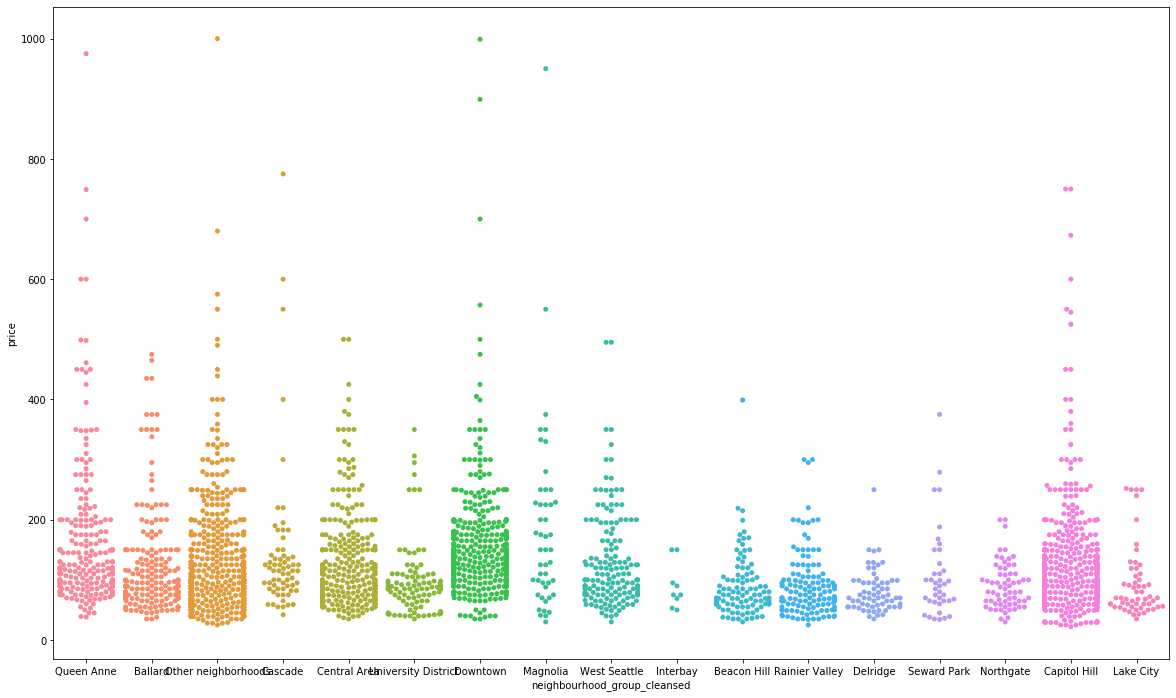

In [60]:
f, axes = plt.subplots(1, 1, figsize=(20,12))
sb.swarmplot(x = 'neighbourhood_group_cleansed', y = 'price', data = airbnb_listings)

Swarmplots with different distributions will be better predictor features for model training 
(eg. property_type, neighbourhood_group_cleansed, room_type)

## Exploratory Analysis of Numeric Variables 

Exploratory analysis of features: 
- accommodates                    
- bathrooms                       
- bedrooms                       
- beds                         
- price                          
- guests_included     
- number_of_reviews               
- total_reviews          
- estimated_revenue

##### (i) Statistical Summary

In [61]:
# Extract only the numeric data variables
numeric_data = pd.DataFrame(airbnb_listings[[
                                            'accommodates',                    
                                            'bathrooms',                       
                                            'bedrooms',                       
                                            'beds',                           
                                            'price',                          
                                            'guests_included',     
                                            'number_of_reviews',               
                                            'total_reviews',            
                                            'estimated_revenue',
                                            ]])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

accommodates  bathrooms  bedrooms     beds    price  guests_included  \
count       3167.00    3167.00   3167.00  3167.00  3167.00          3167.00   
mean           3.39       1.25      1.30     1.74   126.87             1.71   
std            1.99       0.60      0.88     1.16    90.03             1.31   
min            1.00       0.00      0.00     1.00    22.00             0.00   
25%            2.00       1.00      1.00     1.00    75.00             1.00   
50%            3.00       1.00      1.00     1.00   100.00             1.00   
75%            4.00       1.00      2.00     2.00   150.00             2.00   
max           16.00       8.00      7.00    15.00  1000.00            13.00   

       number_of_reviews  total_reviews  estimated_revenue  
count            3167.00        3167.00            3167.00  
mean               26.78         142.50            6304.83  
std                39.93           8.89           24707.99  
min                 1.00          36.00              22.00  
25%                 4.00         140.00             780.00  
50%                13.00         145.00            2400.00  
75%                32.00         148.00            6517.00  
max               474.00         150.00         1200000.00

##### (ii) Boxplots, Distplots, Violinplots

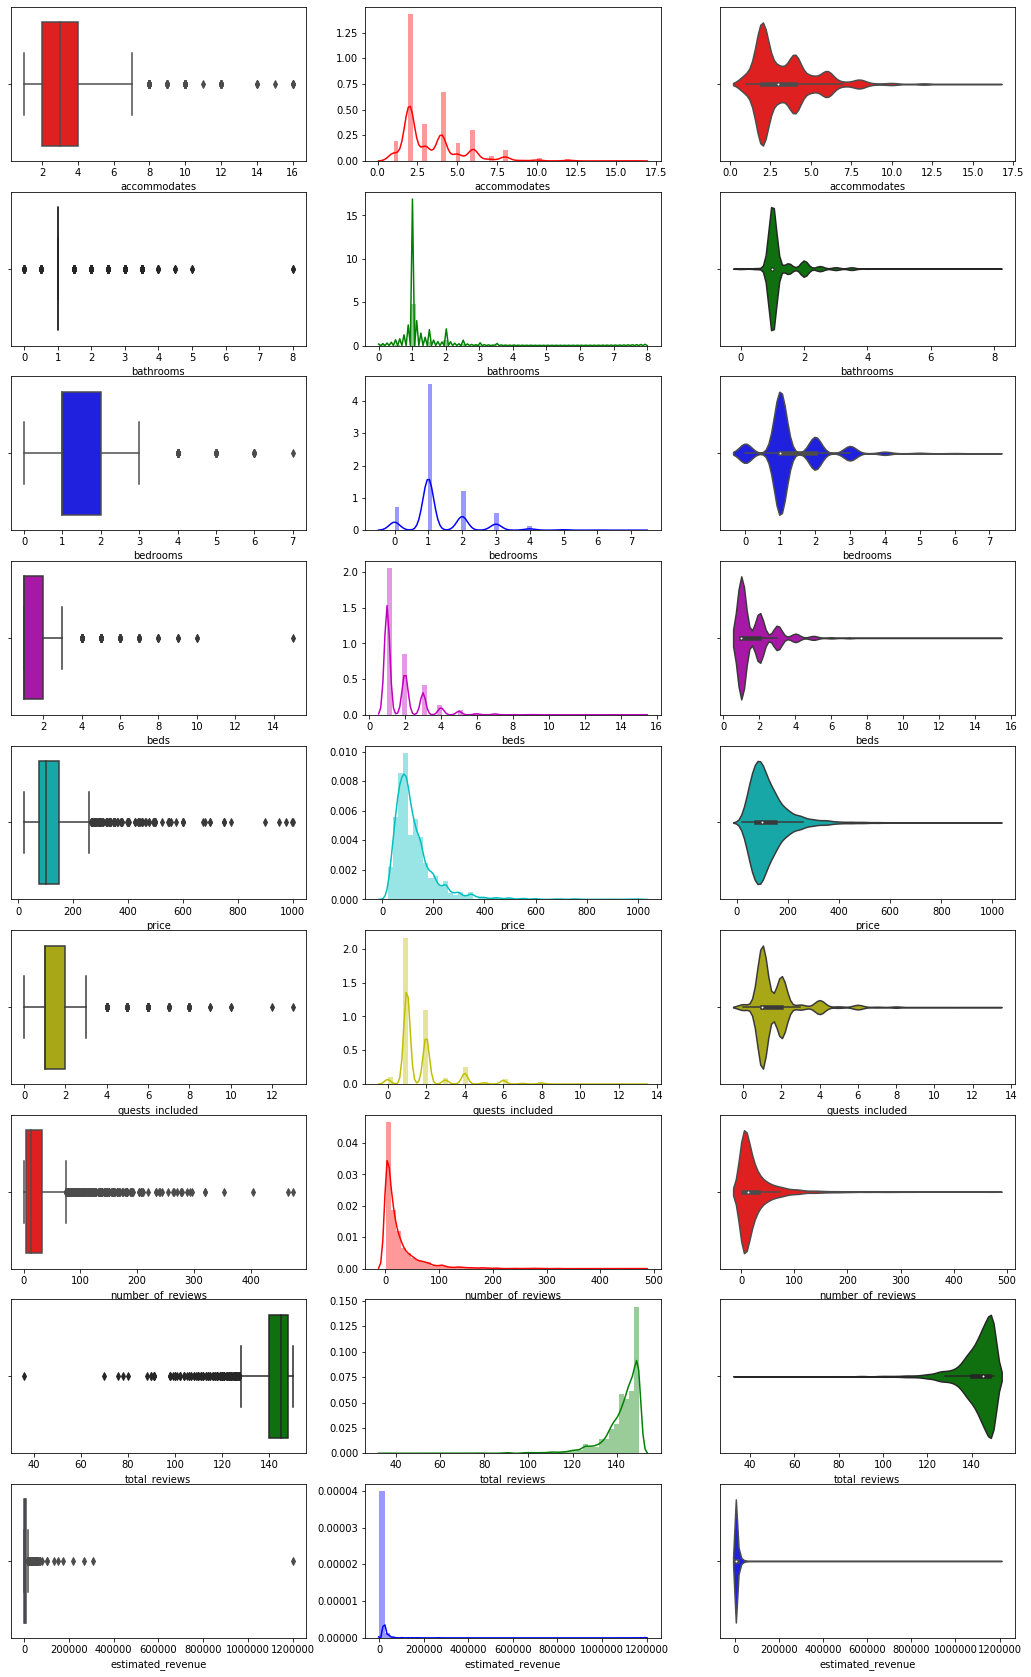

In [62]:
# Draw the distributions of all variables
f, axes = plt.subplots(9, 3, figsize=(18, 30))
colors = ["r", "g", "b", "m", "c", "y", "r", "g", "b"]

count = 0
for var in numeric_data:
    sb.boxplot(numeric_data[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(numeric_data[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(numeric_data[var], color = colors[count], ax = axes[count,2])
    count += 1

Boxplots with different distributions will be better predictor features for model training 
(eg. beds, bedrooms, bathrooms, guests_included, accomodates, guests_included)

##### (iii) Correlation Matrix

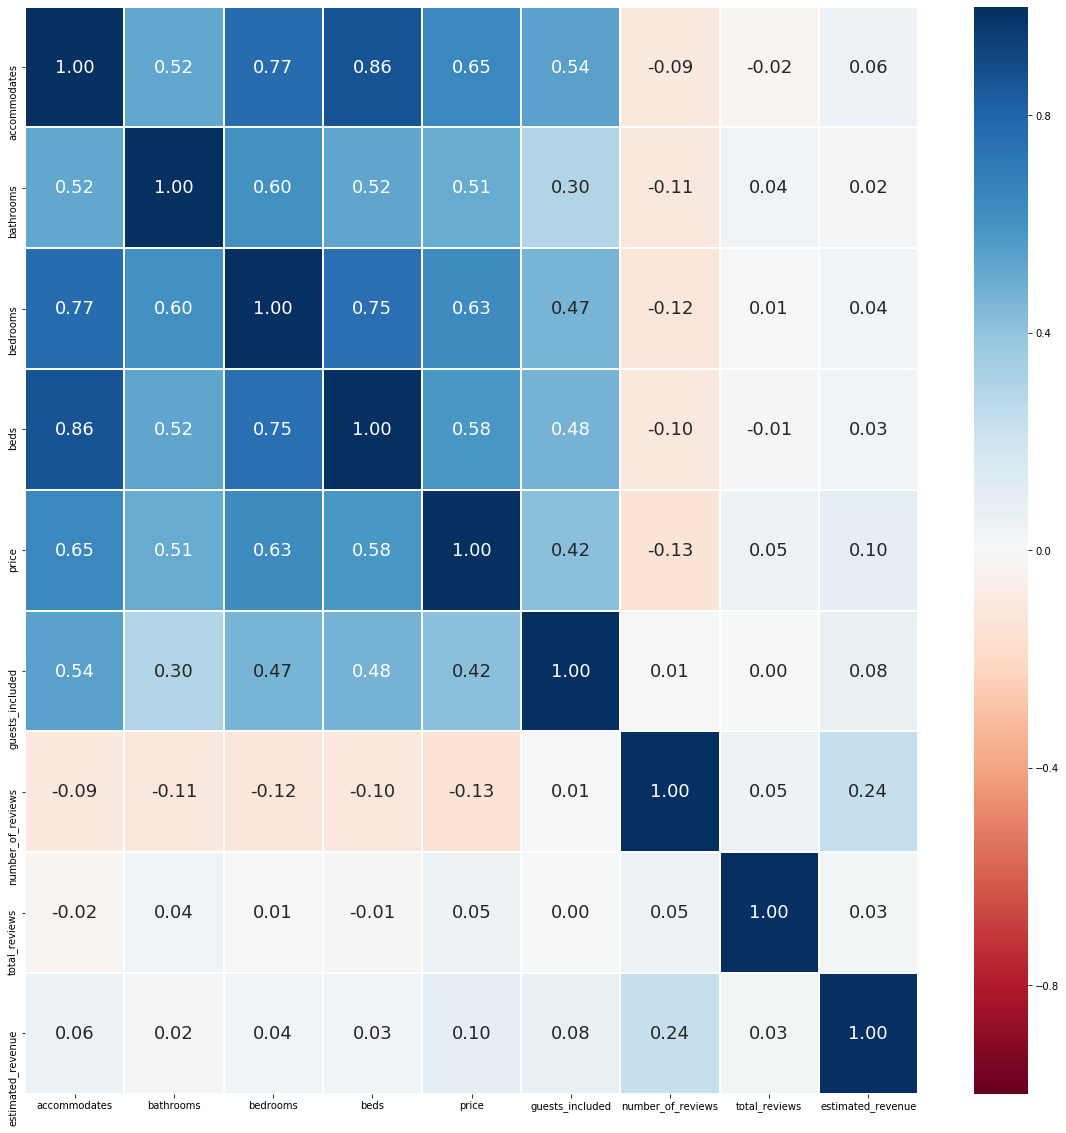

In [63]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

Features with strong (positive or negative) correlation will be better predictor features for model training (eg. beds, bedrooms, bathrooms, guests_included, accomodates, guests_included)

#### (iv) Pairplots

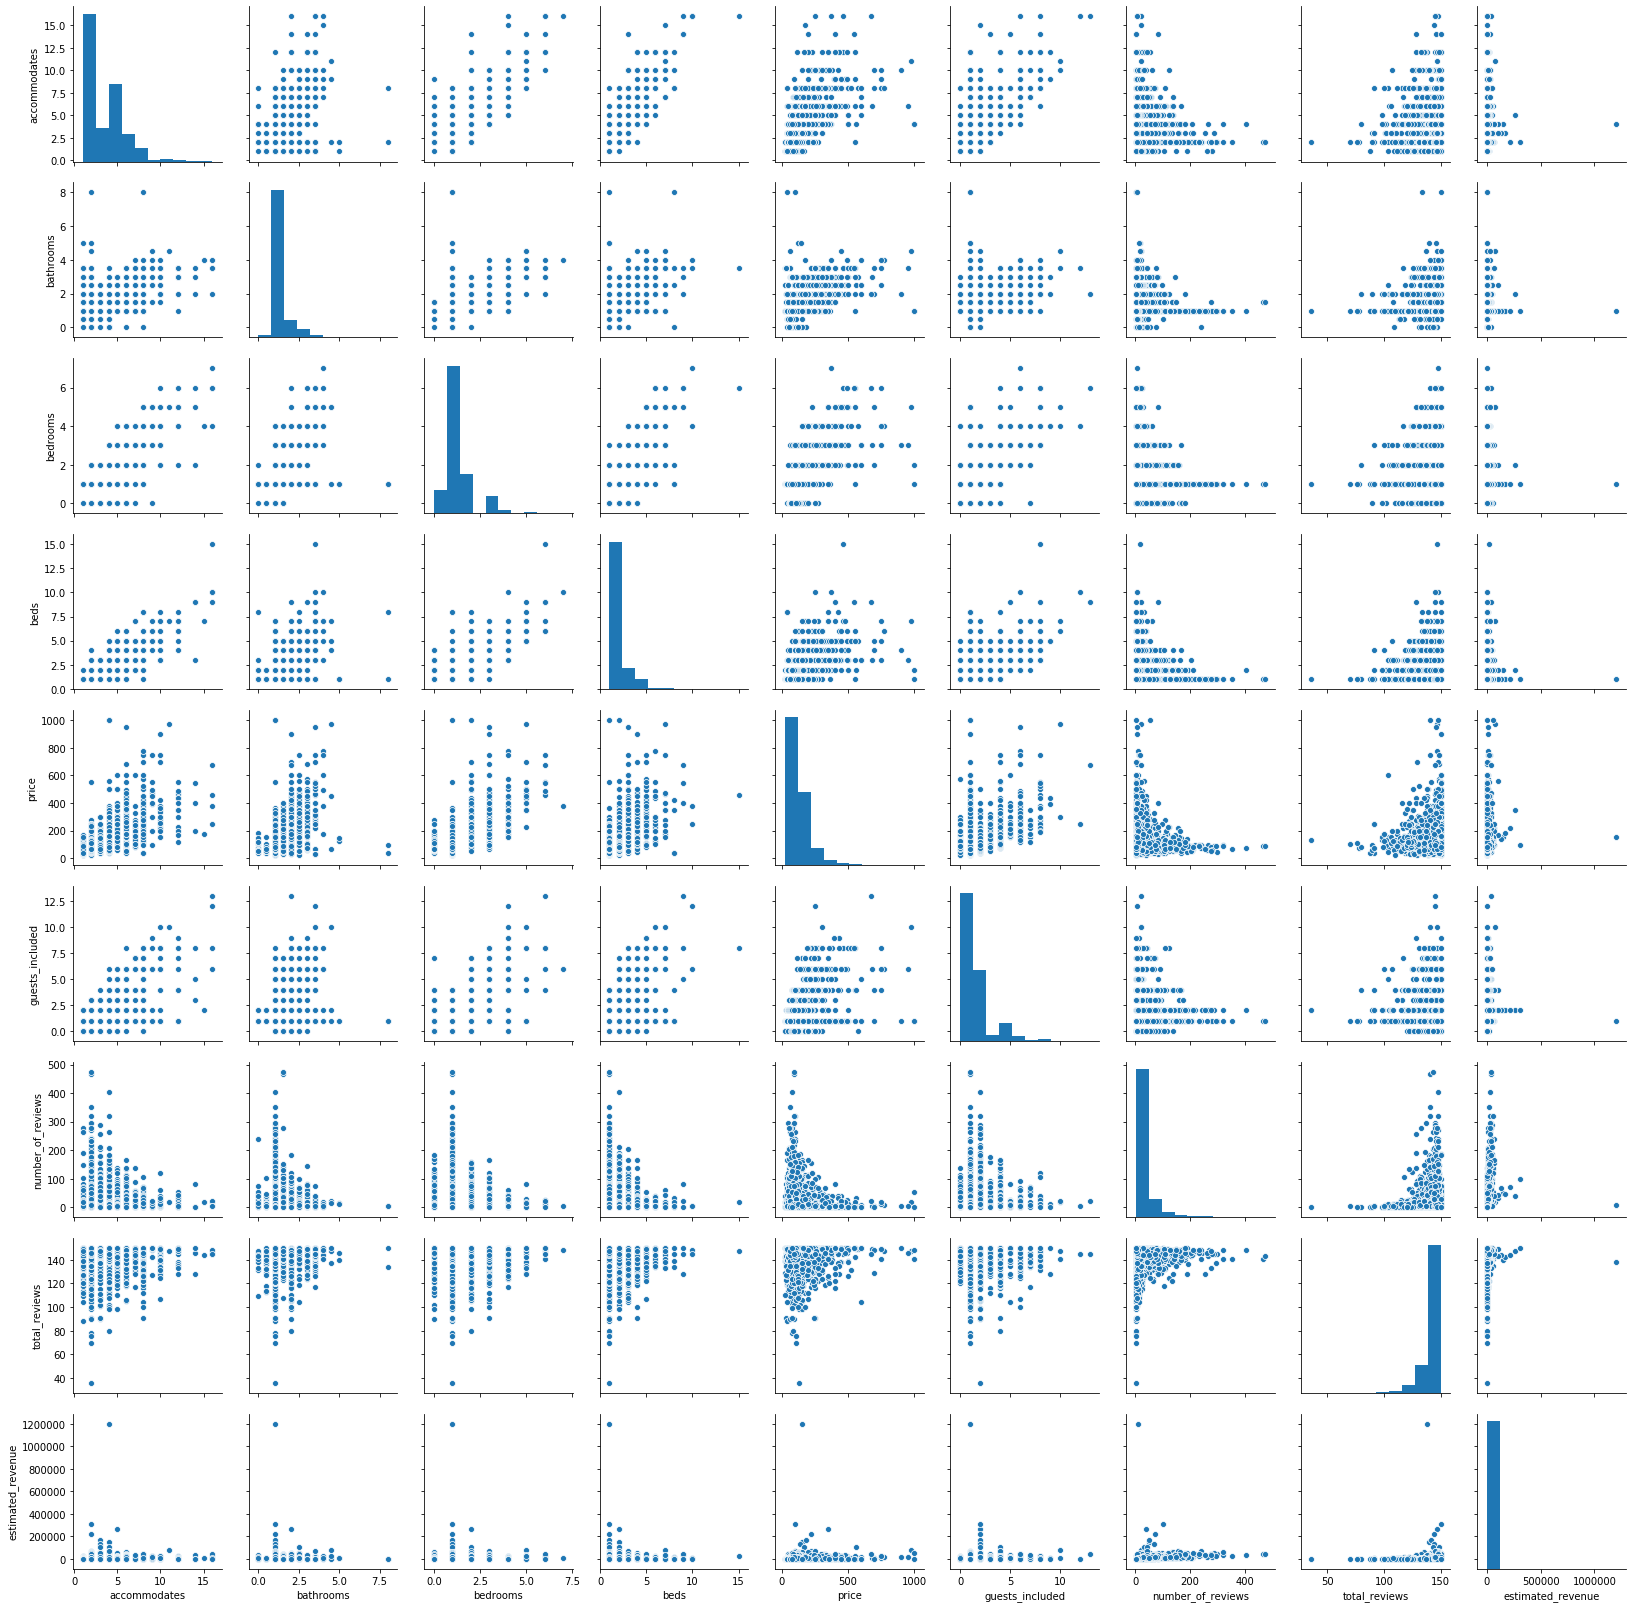

In [64]:
# Draw pairs of variables against one another
sb.pairplot(data = numeric_data)

Features with strong (positive or negative) correlation will be better predictor features for model training (eg. beds, bedrooms, bathrooms, guests_included, accomodates, guests_included)

***
# DATA VISUALISATION

### Visualisation on Seattle Map

In [65]:
# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes

map_df = airbnb_data[
 (airbnb_data['latitude'] >= np.percentile(airbnb_data['latitude'], 0.05)) & 
 (airbnb_data['latitude'] < np.percentile(airbnb_data['latitude'], 99.95)) &
 (airbnb_data['longitude'] >= np.percentile(airbnb_data['longitude'], 0.05)) & 
 (airbnb_data['longitude'] <= np.percentile(airbnb_data['longitude'], 99.95))
    ]

map_df.head()

listing_id                                 name  \
0      241032         Stylish Queen Anne Apartment   
1      953595   Bright & Airy Queen Anne Apartment   
2     3308979  New Modern House-Amazing water view   
3      278830       Charming craftsman 3 bdm house   
4     5956968      Private unit in a 1920s mansion   

  neighbourhood_group_cleansed   latitude   longitude property_type  \
0                   Queen Anne  47.636289 -122.371025     Apartment   
1                   Queen Anne  47.639123 -122.365666     Apartment   
2                   Queen Anne  47.629724 -122.369483         House   
3                   Queen Anne  47.632918 -122.372471         House   
4                   Queen Anne  47.630525 -122.366174         House   

         room_type  accommodates  bathrooms  bedrooms  ...  Safety Card  \
0  Entire home/apt             4        1.0       1.0  ...            0   
1  Entire home/apt             4        1.0       1.0  ...            1   
2  Entire home/apt            11        4.5       5.0  ...            0   
3  Entire home/apt             6        2.0       3.0  ...            0   
4     Private room             2        1.0       1.0  ...            0   

  Shampoo  Smoke Detector  Smoking Allowed  Suitable for Events  TV  Washer  \
0       0               0                0                    0   1       1   
1       0               1                0                    0   1       1   
2       1               1                0                    0   1       1   
3       1               1                0                    0   1       0   
4       1               1                0                    0   0       0   

   Washer / Dryer  Wheelchair Accessible  Wireless Internet  
0               0                      0                  1  
1               0                      0                  1  
2               0                      0                  1  
3               0                      0                  1  
4               0                      0                  1  

[5 rows x 69 columns]

In [66]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# import street map
street_map = gpd.read_file('spdbeat_WGS84.shp')

# import descartes seperately for the final plot to work 
# import spdbeat_WGS84.zip

In [67]:
# designate coordinate reference system for Geopandas
crs = {'init':'espc:4326'}
       
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(map_df['longitude'], map_df['latitude'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(map_df,
 crs = crs,
 geometry = geometry)

# show GeoPandas dataframe
geo_df.head()

listing_id                                 name  \
0      241032         Stylish Queen Anne Apartment   
1      953595   Bright & Airy Queen Anne Apartment   
2     3308979  New Modern House-Amazing water view   
3      278830       Charming craftsman 3 bdm house   
4     5956968      Private unit in a 1920s mansion   

  neighbourhood_group_cleansed   latitude   longitude property_type  \
0                   Queen Anne  47.636289 -122.371025     Apartment   
1                   Queen Anne  47.639123 -122.365666     Apartment   
2                   Queen Anne  47.629724 -122.369483         House   
3                   Queen Anne  47.632918 -122.372471         House   
4                   Queen Anne  47.630525 -122.366174         House   

         room_type  accommodates  bathrooms  bedrooms  ...  Shampoo  \
0  Entire home/apt             4        1.0       1.0  ...        0   
1  Entire home/apt             4        1.0       1.0  ...        0   
2  Entire home/apt            11        4.5       5.0  ...        1   
3  Entire home/apt             6        2.0       3.0  ...        1   
4     Private room             2        1.0       1.0  ...        1   

  Smoke Detector  Smoking Allowed  Suitable for Events  TV  Washer  \
0              0                0                    0   1       1   
1              1                0                    0   1       1   
2              1                0                    0   1       1   
3              1                0                    0   1       0   
4              1                0                    0   0       0   

   Washer / Dryer  Wheelchair Accessible  Wireless Internet  \
0               0                      0                  1   
1               0                      0                  1   
2               0                      0                  1   
3               0                      0                  1   
4               0                      0                  1   

                      geometry  
0  POINT (-122.37103 47.63629)  
1  POINT (-122.36567 47.63912)  
2  POINT (-122.36948 47.62972)  
3  POINT (-122.37247 47.63292)  
4  POINT (-122.36617 47.63053)  

[5 rows x 70 columns]

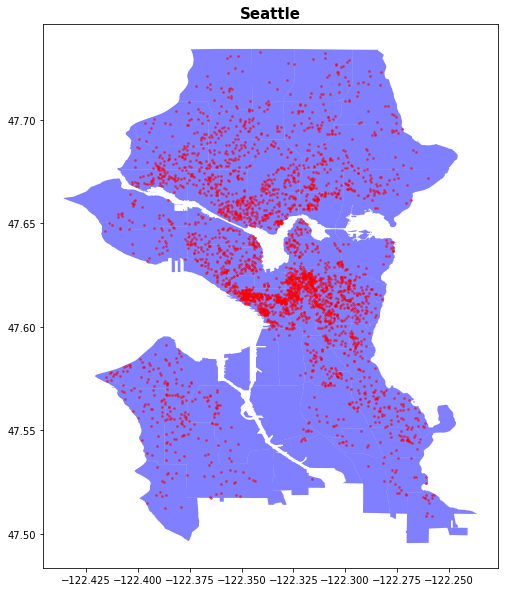

In [68]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(10,10))

# add .shp mapfile to axes
street_map.plot(ax=ax,color='blue',alpha=0.5)

# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize

geo_df.plot(color='red',ax=ax,alpha=0.5, legend=True,markersize=3)

# add title to graph
plt.title('Seattle', fontsize=15,fontweight='bold')

# show map
plt.show()

In [69]:
import folium

# focusing on map of Seattle
folium_map = folium.Map(location=[47.61, -122.325],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")
# Show Folium Map
folium_map

In [70]:
import folium

# focusing on map of Seattle
folium_map = folium.Map(location=[47.61, -122.325],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

# Iterating throught the Map Dataframe
for index, row in map_df.iterrows():
    
    # Obtaining the price 
    price = (row["price"])
    
    # Differentiating the prices
    if price> 200.00 and price<500.00:
        color="#FFD700" # gold
        
    elif price>500.00 and  price<1000.00 :
        color="#FF0000" # red
        
    else:
        color="#0A8A9F" # teal
    
    # Plotting the location on the map using latitudes and longitudes
    folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        color=color,radius = 0.5, 
                        fill=True).add_to(folium_map)
    
# Show the folium map
folium_map

### Sentiment Analysis on textual Data and Visualisation using Word Cloud 
In this project we will be focusing on the textual data on summary of the airbnb listings. We will use nltk annd regex to clean the text, using their corpus to remove stopwords before lemmatising the words to ensure they are all in their root words.

We will be using nltk's VADER sentiment analyser to calculate the sentiments of each summary before plotting it against our previously calculated revenue and finding the words that influence the sentiment of each summary the most. Therefore we will be able to advise the users on which words would be the best to use in their summaries to have higher sentiments. 

We will finally show these on a word cloud.

In [71]:
# Importing relevant packages for sentiment analysis
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from scipy.stats import gaussian_kde

nltk.download('wordnet')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
ori_sw = stopwords.words("english")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Razer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [72]:
description_df = airbnb_data2[['id', 'summary', 'space', 'description']]
description_df.head()

id                                            summary  \
0   241032                                                NaN   
1   953595  Chemically sensitive? We've removed the irrita...   
2  3308979  New modern house built in 2013.  Spectacular s...   
3  7421966  A charming apartment that sits atop Queen Anne...   
4   278830  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description  
0  Make your self at home in this charming one-be...  
1  Chemically sensitive? We've removed the irrita...  
2  New modern house built in 2013.  Spectacular s...  
3  A charming apartment that sits atop Queen Anne...  
4  Cozy family craftman house in beautiful neighb...

In [73]:
def CleaningData(X):
    X = str(X) # converting all objects into strings
    X = X.lower() # ensure all are in lower caps (capitalisation matters to SentimentIntensityAnalyser)
    X = re.sub(r'\W+',' ', X) # removing all not words
    X = re.sub('\d+','',X) # removing all digits

    return X

#Apply the Function
description_df['summary'] = description_df['summary'].apply(CleaningData)
description_df.head()

C:\Users\Razer\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


id                                            summary  \
0   241032                                                nan   
1   953595  chemically sensitive we ve removed the irritan...   
2  3308979  new modern house built in  spectacular sunset ...   
3  7421966  a charming apartment that sits atop queen anne...   
4   278830  cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description  
0  Make your self at home in this charming one-be...  
1  Chemically sensitive? We've removed the irrita...  
2  New modern house built in 2013.  Spectacular s...  
3  A charming apartment that sits atop Queen Anne...  
4  Cozy family craftman house in beautiful neighb...

In [74]:
# splitting, removing stopwords, stemming and lemmatizing
stripped_content = []
for string in description_df['summary']:
    string_list = []
    new_string_list = []
    newer_string_list = []
    split_list = string.split()
    for word in split_list:
        if word not in ori_sw:
            string_list.append(word)
    for word in string_list:
        stemmed = stemmer.stem(word)
        new_string_list.append(stemmed)
    for stemmed_word in new_string_list:
        lemmatized = lemmatizer.lemmatize(stemmed_word, pos="v")
        newer_string_list.append(lemmatized)
    
    stripped_content.append(' '.join(newer_string_list))

description_df['stripped_content'] = stripped_content
description_df.sample(8)

C:\Users\Razer\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


id                                            summary  \
3272  4092037  enjoy a brand new modern home in seattle just ...   
3474  9096972  beautiful quiet daylight ground floor apartmen...   
2287  9823290  private bedroom with full bath in dutch coloni...   
908   6528192  private room in attic apartment with northern ...   
1718  6134382  private room shared bath in new townhouse clos...   
1627  6494181  seattle suites llc manages privately owned fur...   
2390  4681687  comfy stand alone studio with covered parking ...   
2312  2520890  this guest room is located in our urban barn i...   

                                                  space  \
3272  Enjoy a brand-new, modern home (occupied since...   
3474  Guests will have the ground floor all to thems...   
2287          1920's Dutch Colonial Home with Queen bed   
908   Attic apartment with sloped ceilings and giant...   
1718  Furnished bedroom (full size wall bed) with he...   
1627  Live like a Seattleite.  In the heart of downt...   
2390                                                NaN   
2312  The Passiflora Guest Room is your own private ...   

                                            description  \
3272  Enjoy a brand-new modern home in Seattle just ...   
3474  Beautiful, quiet daylight ground floor apartme...   
2287  Private bedroom with full bath in Dutch Coloni...   
908   Private room in attic apartment with northern ...   
1718  Private room / shared bath in new townhouse cl...   
1627  Seattle Suites, LLC manages privately owned fu...   
2390  Comfy stand-alone studio with covered parking ...   
2312  This guest room is located in our urban barn i...   

                                       stripped_content  
3272  enjoy brand new modern home seattl minut north...  
3474  beauti quiet daylight grind floor apart floor ...  
2287  privat bedroom full bath dutch coloni mile sou...  
908   privat room attic apart northern exposur pictu...  
1718  privat room share bath new townhous close town...  
1627  seattl suit llc manag privat own furnish condo...  
2390  comfi stand alon studio cover park great west ...  
2312  guest room locat urban barn separ build home f...

In [75]:
sid = SentimentIntensityAnalyzer()

#Creating function to conduct sentiment analysis on column
def SentimentAnalysis(Y):
    Y = sid.polarity_scores(Y)
    return Y['compound']

#Applying function to column and putting sentiment analysis compound results only into a new column
description_df['compound_scores'] = description_df['stripped_content'].apply(SentimentAnalysis)
description_df.head()

C:\Users\Razer\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


id                                            summary  \
0   241032                                                nan   
1   953595  chemically sensitive we ve removed the irritan...   
2  3308979  new modern house built in  spectacular sunset ...   
3  7421966  a charming apartment that sits atop queen anne...   
4   278830  cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description  \
0  Make your self at home in this charming one-be...   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                    stripped_content  compound_scores  
0                                                nan           0.0000  
1  chemic sensit remov irrit trigger allergi asth...          -0.1531  
2  new modern hous build spectacular sunset water...           0.5719  
3  charm apart sit atop queen ann hill northwest ...           0.8074  
4  cozi famili craftman hous beauti neighborhood ...           0.5719

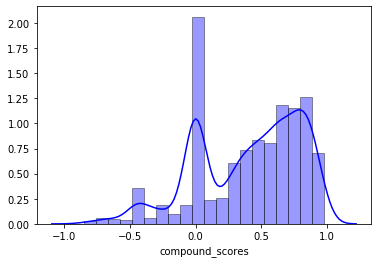

In [76]:
sb.distplot(description_df['compound_scores'], hist=True, kde=True, 
              color = 'blue', 
             hist_kws={'edgecolor':'black'},)

As seen on the density plot above, most of the words used in Summary is mostly positive.

In [77]:
# merging both df
price_df = airbnb_listings[['listing_id', 'estimated_revenue']]
price_df.rename(columns={'listing_id':'id'}, inplace=True)

descriptions_price = pd.merge(description_df, price_df, on = "id", how = "inner")

C:\Users\Razer\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


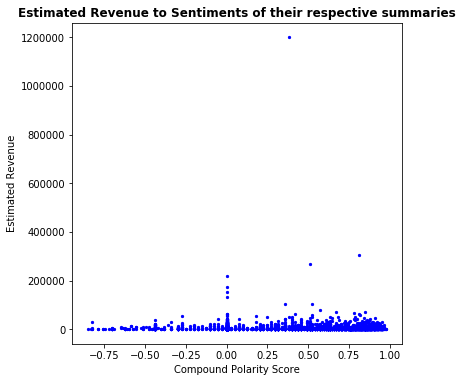

In [78]:
fig1 = plt.figure(figsize=(13,13))
ax1 = fig1.add_subplot(2, 2, 1)
                        
descriptions_price.plot(
    kind="scatter", ax=ax1, marker='.', color = "blue", s = 20,
    x="compound_scores", y="estimated_revenue"
)

ax1.set_title("Estimated Revenue to Sentiments of their respective summaries", fontweight ="bold")
ax1.set_xlabel("Compound Polarity Score")
ax1.set_ylabel("Estimated Revenue")


plt.show()

In [79]:
# correlation between sentiment and estimatd revenue
print (descriptions_price['compound_scores'].corr(descriptions_price['estimated_revenue']))


-0.010341580869407152


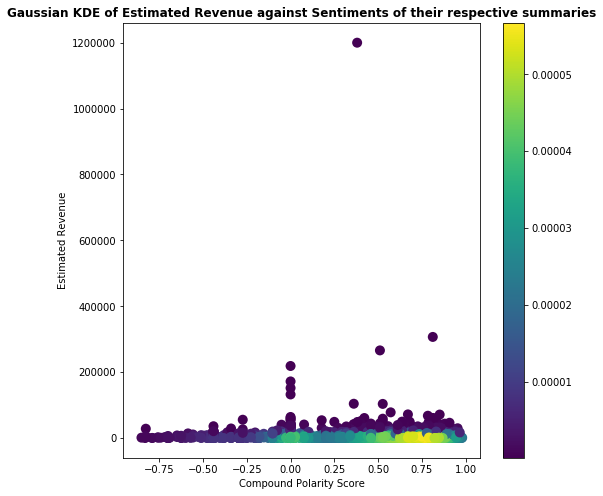

In [80]:
x = descriptions_price["compound_scores"]
y = descriptions_price["estimated_revenue"]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize = (8,8))
graph = ax.scatter(x, y, c=z, s=100, edgecolor='')
ax.set_title("Gaussian KDE of Estimated Revenue against Sentiments of their respective summaries", fontweight ="bold")
ax.set_xlabel("Compound Polarity Score")
ax.set_ylabel("Estimated Revenue")
plt.colorbar(graph)
plt.show()

In [81]:
# Investigating from all negative and positive news, the words that contributed most to their respective sentiments
def ImpactonPrice(score):
    if score > 0.0:
        return 'Positive'
    elif score < 0.0:
        return 'Negative'
    else:
        return 'Neutral'
    
description_df['Impact_on_Price'] = description_df['compound_scores'].apply(ImpactonPrice)

neu = description_df['Impact_on_Price'] == 'Neutral'
print(len(description_df[neu]))
# we are omitting these 690 neutral articles from this investigation

690


C:\Users\Razer\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


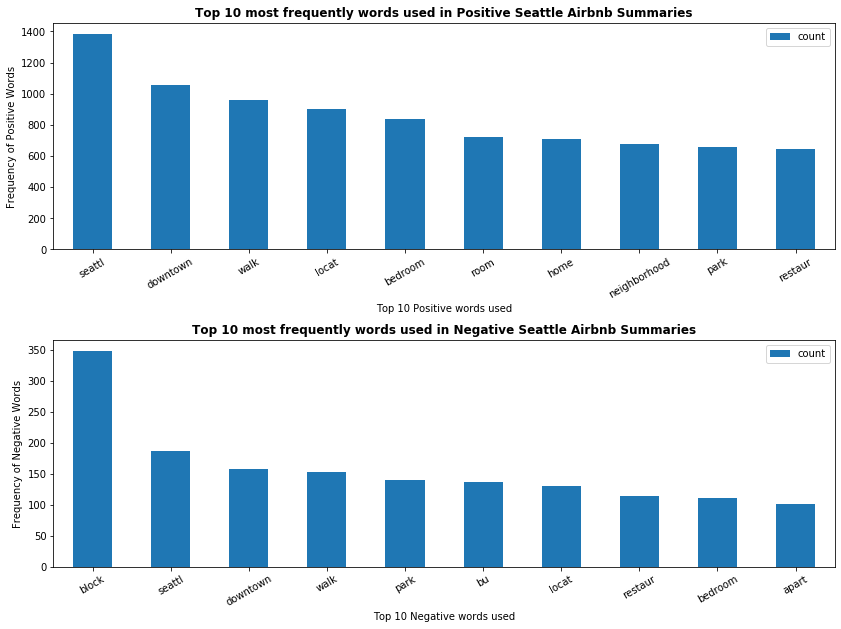

In [82]:
# Creating seperate dataframes for positive and negative news
posi_cond = description_df['Impact_on_Price'] == 'Positive'
posi_df = description_df[posi_cond]
nega_cond = description_df['Impact_on_Price'] == 'Negative'
nega_df = description_df[nega_cond]

# Turning all words from positive and negative news into 2 seperate dataframes with their count
posi_string = []
for strings in posi_df["stripped_content"]:
    posi_string.append(strings)
    
posi_string = ''.join(posi_string)
pos_words_list = posi_string.split()
posi_df = pd.DataFrame(pos_words_list, columns=['words'])
posi_df = posi_df.groupby('words').size().reset_index(name='count')
posi_df.sort_values('count', ascending=False, inplace=True)

nega_string = []
for strings in nega_df["stripped_content"]:
    nega_string.append(strings)
nega_string = ''.join(nega_string)
nega_words_list = nega_string.split()
nega_df = pd.DataFrame(nega_words_list, columns=['words'])
nega_df = nega_df.groupby('words').size().reset_index(name='count')
nega_df.sort_values('count', ascending=False, inplace=True)

# # plotting a graph of the top 10 most positive words and negative words and their counts
fig1 = plt.figure(figsize=(14, 10))
ax1 = fig1.add_subplot(2, 1, 1)
ax2 = fig1.add_subplot(2, 1, 2)
                    
posi_df[:10].plot(
    kind="bar", ax=ax1, 
    x="words", y="count"
)

nega_df[:10].plot(
    kind="bar", ax=ax2, 
    x="words", y="count"
)

ax1.set_title("Top 10 most frequently words used in Positive Seattle Airbnb Summaries", fontweight ="bold")
ax1.set_xlabel("Top 10 Positive words used")
ax1.set_ylabel("Frequency of Positive Words")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)

ax2.set_title("Top 10 most frequently words used in Negative Seattle Airbnb Summaries", fontweight ="bold")
ax2.set_xlabel("Top 10 Negative words used")
ax2.set_ylabel("Frequency of Negative Words")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)
plt.subplots_adjust(wspace=0.50, hspace=0.4)
plt.show()

Frequency of words doesn't tell us enough, we want to find out each word's VADER polarity value and its contributions to the overall sentiment.

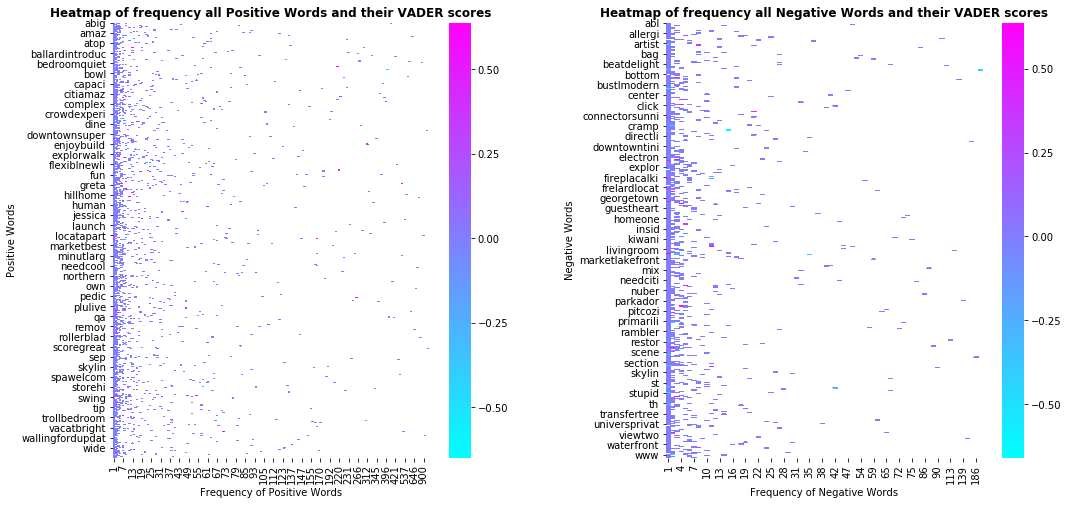

In [83]:
# Frequency of words doesn't tell us enough, we want to find out each word's VADER polarity value and its contributions to the 
# overall sentiment.

#Recall the previous function (SentimentAnalysis)
posi_df['compound_scores'] = posi_df['words'].apply(SentimentAnalysis)
nega_df['compound_scores'] = nega_df['words'].apply(SentimentAnalysis)

# preparing data to plot as a heatmap
pos_pivot_table = posi_df.pivot_table(values = "compound_scores", index=["words"], columns=["count"])       
neg_pivot_table = nega_df.pivot_table(values = "compound_scores", index=["words"], columns=["count"])     
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,8))

sb.heatmap(pos_pivot_table, ax=ax1, cmap = "cool")
sb.heatmap(neg_pivot_table, ax=ax2, cmap = "cool")

ax1.set_title("Heatmap of frequency all Positive Words and their VADER scores", fontweight ="bold")
ax1.set_xlabel("Frequency of Positive Words")
ax1.set_ylabel("Positive Words")

ax2.set_title("Heatmap of frequency all Negative Words and their VADER scores", fontweight ="bold")
ax2.set_xlabel("Frequency of Negative Words")
ax2.set_ylabel("Negative Words")

plt.subplots_adjust(wspace=0.4)
plt.show()

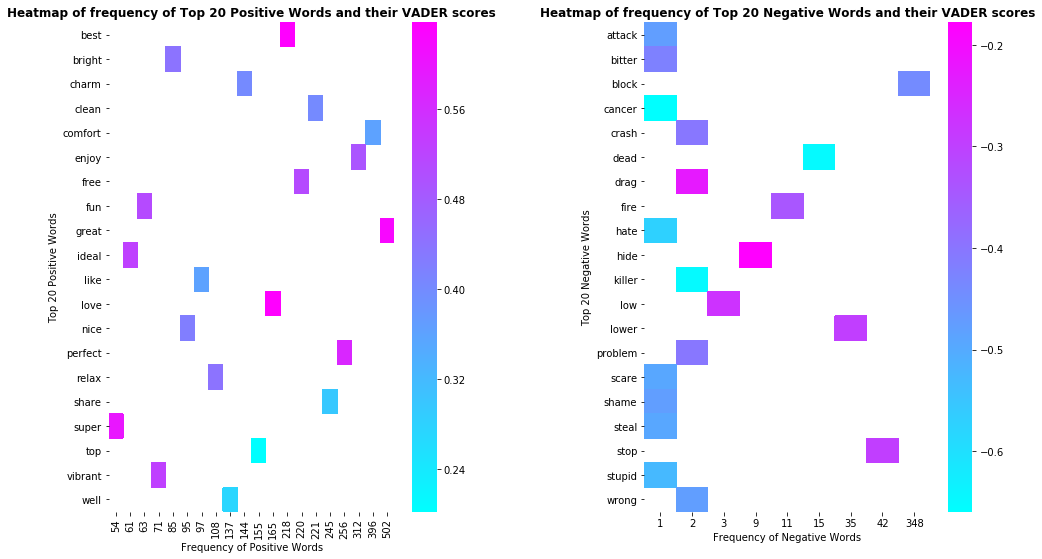

In [84]:
# Looking at all the words and their corresponding frequencies and VADER polarity scores may not be able to yeild us much useful 
# data, hence we are taking a more zoomed in look into the words with the highest counts and VADER polarity scores to find the 
# weighted words, that contributes most to the overall sentiment.

posi_df["aggregated_scores"] = posi_df["compound_scores"] * posi_df["count"]
posi_agg_df = posi_df.nlargest(20, "aggregated_scores", keep='first')
pos_agg_pivot_table = posi_agg_df.pivot_table(values = "compound_scores", index=["words"], columns=["count"]) 
nega_df["aggregated_scores"] = nega_df["compound_scores"] * nega_df["count"]
nega_agg_df = nega_df.nsmallest(20, "aggregated_scores", keep='first')
neg_agg_pivot_table = nega_agg_df.pivot_table(values = "compound_scores", index=["words"], columns=["count"]) 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,9))

sb.heatmap(pos_agg_pivot_table, ax=ax1, cmap = "cool")
sb.heatmap(neg_agg_pivot_table, ax=ax2, cmap = "cool")

ax1.set_title("Heatmap of frequency of Top 20 Positive Words and their VADER scores", fontweight ="bold")
ax1.set_xlabel("Frequency of Positive Words")
ax1.set_ylabel("Top 20 Positive Words")

ax2.set_title("Heatmap of frequency of Top 20 Negative Words and their VADER scores", fontweight ="bold")
ax2.set_xlabel("Frequency of Negative Words")
ax2.set_ylabel("Top 20 Negative Words")

plt.subplots_adjust(wspace=0.5)
plt.show()

From this plot we see that these words presented in the plot are the ones most commonly used and at the same time heavily influence the polarity of the sentiment.
Hence it is not a stretch to say that if these words appear in the summary, it causes the summary to have a more polarised sentiment, resulting in an increased chance on booking.








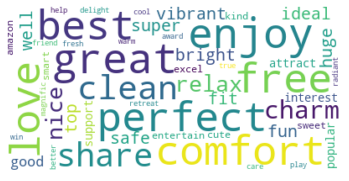

In [85]:
from wordcloud import WordCloud, ImageColorGenerator

# Create and generate a word cloud image:
text_df = posi_df.nlargest(50, "aggregated_scores", keep='first')
text = ' '.join(list(text_df['words']))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [86]:
from PIL import Image
img_mask = np.array(Image.open("airbnb.png"))
img_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [87]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [88]:
# Transforming mask into a new one that will work with the function:
transformed_img_mask = np.ndarray((img_mask.shape[0],img_mask.shape[1]), np.int32)

for i in range(len(img_mask)):
    transformed_img_mask[i] = list(map(transform_format, img_mask[i]))

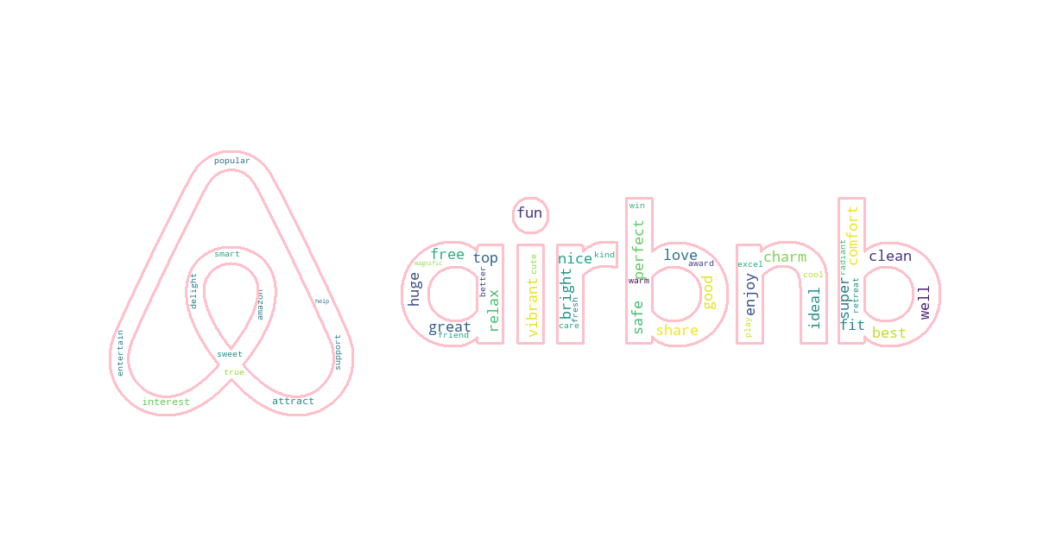

In [89]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_img_mask,
               contour_width=3, contour_color='pink')

# Generate a wordcloud
wc.generate(text)


# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

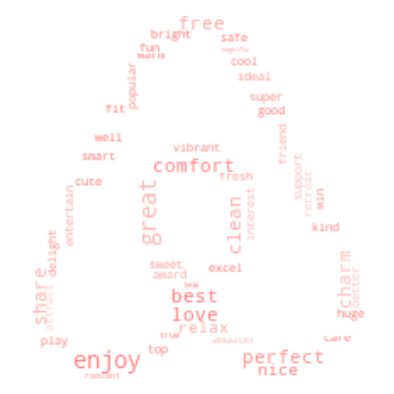

In [90]:
# Generate a word cloud image

mask = np.array(Image.open("airbnb1.png").convert("RGB"))
wordcloud = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

# PRICE PREDICTION MODEL
Attempting multivariate regression to predict listing price. Training approaches adopted are as follows:
* RandomForestRegressor
* XGBRegressor (Boosted Trees)

Also predicting important features for price determination.

#### Merging Sentiment Analysis results
Merging airbnb_listings with description_df on listing_id.

In [91]:
# Creating safety copies
airbnb_listings_copy = airbnb_listings.copy() 
description_df_copy = description_df.copy()

# Merging airbnb_listings with description_df on listing_id
description_df_copy.rename(columns={'id':'listing_id'}, inplace=True)
airbnb_listings = pd.merge(airbnb_listings, description_df_copy, on='listing_id')

airbnb_listings.head()

listing_id                                 name  \
0      241032         Stylish Queen Anne Apartment   
1      953595   Bright & Airy Queen Anne Apartment   
2     3308979  New Modern House-Amazing water view   
3      278830       Charming craftsman 3 bdm house   
4     5956968      Private unit in a 1920s mansion   

  neighbourhood_group_cleansed   latitude   longitude property_type  \
0                   Queen Anne  47.636289 -122.371025     Apartment   
1                   Queen Anne  47.639123 -122.365666     Apartment   
2                   Queen Anne  47.629724 -122.369483         House   
3                   Queen Anne  47.632918 -122.372471         House   
4                   Queen Anne  47.630525 -122.366174         House   

         room_type  accommodates  bathrooms  bedrooms  ...  Washer / Dryer  \
0  Entire home/apt             4        1.0       1.0  ...               0   
1  Entire home/apt             4        1.0       1.0  ...               0   
2  Entire home/apt            11        4.5       5.0  ...               0   
3  Entire home/apt             6        2.0       3.0  ...               0   
4     Private room             2        1.0       1.0  ...               0   

  Wheelchair Accessible  Wireless Internet  estimated_revenue  \
0                     0                  1            17595.0   
1                     0                  1            12900.0   
2                     0                  1            78000.0   
3                     0                  1            17100.0   
4                     0                  1             2040.0   

                                             summary  \
0                                                nan   
1  chemically sensitive we ve removed the irritan...   
2  new modern house built in  spectacular sunset ...   
3  cozy family craftman house in beautiful neighb...   
4  we re renting out a small private unit of one ...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3  Cozy family craftman house in beautiful neighb...   
4  If you include a bit of your background in you...   

                                         description  \
0  Make your self at home in this charming one-be...   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  Cozy family craftman house in beautiful neighb...   
4  We're renting out a small private unit of one ...   

                                    stripped_content  compound_scores  \
0                                                nan           0.0000   
1  chemic sensit remov irrit trigger allergi asth...          -0.1531   
2  new modern hous build spectacular sunset water...           0.5719   
3  cozi famili craftman hous beauti neighborhood ...           0.5719   
4  rent small privat unit one seattl beauti hous ...           0.6249   

   Impact_on_Price  
0          Neutral  
1         Negative  
2         Positive  
3         Positive  
4         Positive  

[5 rows x 76 columns]

#### Evaluate sentiment analysis scores
Observe correlation of compound_scores with price to ascertain if it should be used as a feature in the model training. 

In [92]:
# Checking correlation between Sentiment scores and Price
data = pd.DataFrame(airbnb_listings[[                    
                                    'price', 'compound_scores'
                                    ]])

print(data.corr())

                    price  compound_scores
price            1.000000        -0.013367
compound_scores -0.013367         1.000000


Low correlation, hence should NOT be used as a feature during training.

#### PREPARING DATA FOR TRAINING
Feature Selection
* Pick only those features with strong correlation with price. 
* One hot encode categorical variables.  
* Normalise price. 

In [93]:
# Prep data, Normalise, One-Hot
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

# Feature Selection - extract relevant features for training
pd_model_data_x = airbnb_listings[['neighbourhood_group_cleansed', 
                                   'property_type', 
                                   'room_type',
                                   'accommodates',
                                   'bathrooms',
                                   'bedrooms',
                                   'beds',
                                   'guests_included',                         
                                   'Heating',                                        
                                   'Internet',                         
                                   'Kitchen',                         
                                   'Smoke Detector',                  
                                   'Washer',                          
                                   'Wireless Internet', 
                                ]]

# One Hot encode categorical variables 
pd_model_data_x['accommodates'] = min_max_scaler.fit_transform(pd_model_data_x[['accommodates']])
pd_model_data_x['bathrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bathrooms']])
pd_model_data_x['bedrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bedrooms']])
pd_model_data_x['beds'] = min_max_scaler.fit_transform(pd_model_data_x[['beds']])
pd_model_data_x['guests_included'] = min_max_scaler.fit_transform(pd_model_data_x[['guests_included']])

pd_model_data_x = pd.get_dummies(pd_model_data_x, columns=['neighbourhood_group_cleansed','room_type', 'property_type'])

# Normalise price 
pd_model_data_y = np.log(airbnb_listings['price'])


C:\Users\Razer\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Razer\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Razer\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

#### Splitting data into Test and Train 
Randomly splitting data into X_train, X_test, y_train, y_test. 

In [94]:
# Train and Test - x and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pd_model_data_x,pd_model_data_y,test_size=0.10, random_state =42)

#### (i) RandomForestRegressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators= 20, max_depth= 8, random_state= 42)

regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [96]:
print(regr.feature_importances_)

[4.33319072e-02 1.89476363e-01 1.16837321e-01 9.03514706e-03
 1.50304461e-02 1.28741109e-03 3.82596727e-03 3.27308148e-03
 8.53051971e-03 1.79692717e-03 2.05677352e-03 9.64507313e-04
 2.82338429e-03 1.30244422e-02 2.95978864e-03 3.47079202e-03
 2.55873495e-03 2.78939100e-02 1.87040563e-04 2.56565773e-05
 3.34392243e-03 1.08375170e-03 2.17816859e-03 1.18966292e-02
 2.62416336e-03 1.86630230e-04 1.33575855e-03 7.91704149e-04
 4.87282057e-01 2.20691641e-02 3.31585337e-03 1.89568901e-03
 1.50638091e-03 2.37268776e-04 3.26555921e-05 8.94568786e-04
 3.99376338e-04 1.37562410e-06 3.84726078e-03 7.23784393e-05
 2.84731419e-03 2.13161660e-03 2.71267637e-04 0.00000000e+00
 2.61881651e-04 1.10304219e-03 0.00000000e+00]


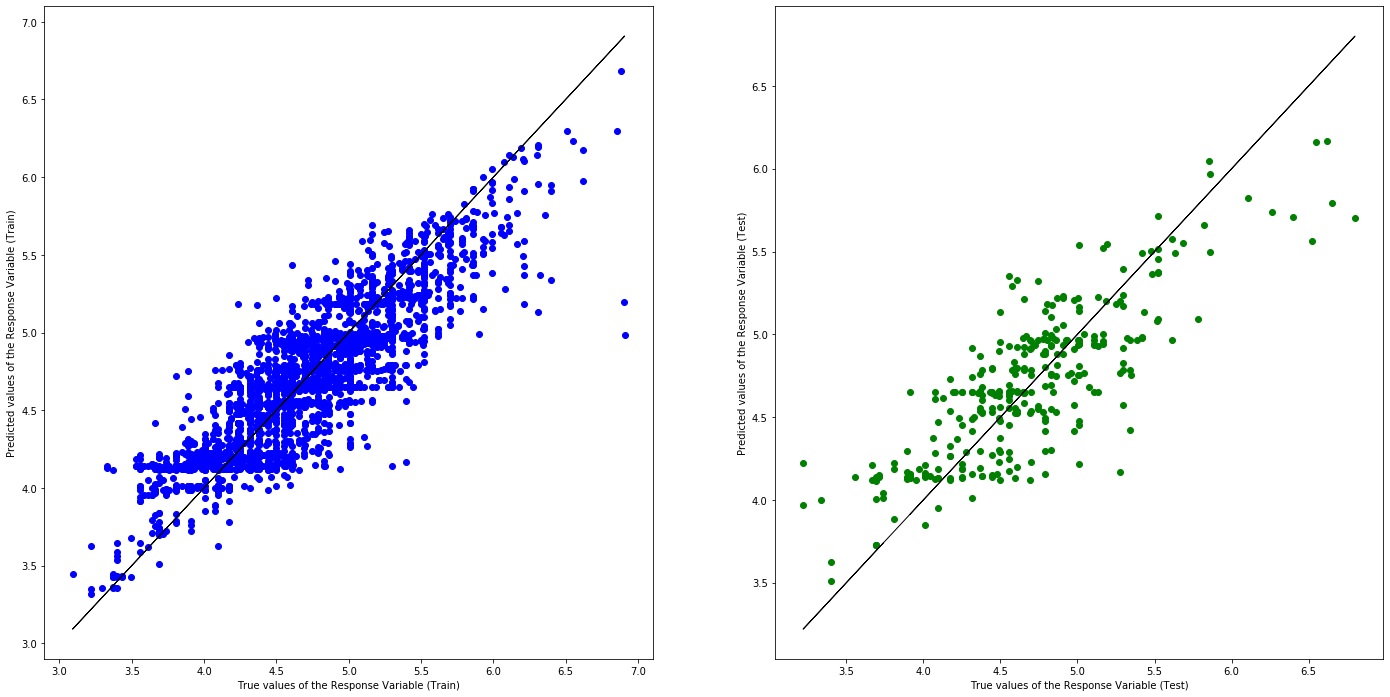

In [97]:
# Predict the Total values from Predictors
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [98]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Predict Response corresponding to Predictors
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regr.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regr.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7623403959307832
Mean Squared Error (MSE) 	: 0.07312786815538357

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6770700756783649
Mean Squared Error (MSE) 	: 0.10868905983090549



#### (ii) XGBRegressor 

In [99]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.2,
                max_depth = 10, reg_lambda = 10, n_estimators = 75, seed= 42)

In [100]:
xg_reg.fit(X_train,y_train)

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Predict Response corresponding to Predictors
y_train_pred = xg_reg.predict(X_train)
y_test_pred = xg_reg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xg_reg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xg_reg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

[18:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8166415114508603
Mean Squared Error (MSE) 	: 0.05641941308581291

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6928282025230329
Mean Squared Error (MSE) 	: 0.10338532096235377



#### Determining Feature Importances
Determining best predictors of listing price.

In [101]:
# DATA CLEANING 

pd_model_data_x = airbnb_listings[['neighbourhood_group_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds','guests_included']]
pd_model_data_x['accommodates'] = min_max_scaler.fit_transform(pd_model_data_x[['accommodates']])
pd_model_data_x['bathrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bathrooms']])
pd_model_data_x['bedrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bedrooms']])
pd_model_data_x['beds'] = min_max_scaler.fit_transform(pd_model_data_x[['beds']])
pd_model_data_x['guests_included'] = min_max_scaler.fit_transform(pd_model_data_x[['guests_included']])

pd_model_data_x = pd.get_dummies(pd_model_data_x, columns=['neighbourhood_group_cleansed','property_type','room_type'])
pd_model_data_y = airbnb_listings['price']

X_train, X_test, y_train, y_test = train_test_split(pd_model_data_x,pd_model_data_y,test_size=0.10, random_state=789)

C:\Users\Razer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Razer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Razer\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

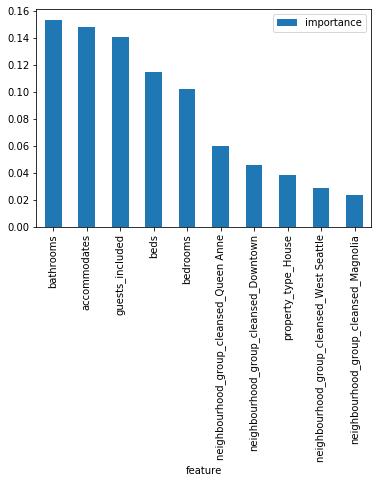

In [102]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

#Make the decision tree
dtree = tree.DecisionTreeClassifier(class_weight="balanced", min_weight_fraction_leaf=0.01,)

dtree.fit(X_train,y_train)

#Look at outputs
importances = dtree.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
_ = tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')